# <center>Le modèle linéaire</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercice 1
Définir la variable dépendante $y = wage$. La matrice de variable explicative inclut une constante et les variables $educ, exper, tenure$.

In [2]:
df_wage1 = pd.read_csv('../textfiles/WAGE1.raw', delim_whitespace=True, header=None, 
                 names=['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married', 'numdep', 
'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman', 'trcommpu', 'trade', 
'services', 'profserv', 'profocc', 'clerocc', 'servocc', 'lwage', 'expersq', 'tenursq' ])

In [3]:
df_wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
y = wage = df_wage1["wage"]
y.head()

0    3.10
1    3.24
2    3.00
3    6.00
4    5.30
Name: wage, dtype: float64

In [5]:
X = df_wage1[["educ", "exper", "tenure"]]
X.insert(0, "const",  1)
X.head()

,const,educ,exper,tenure
0,1,11,2,0
1,1,12,22,2
2,1,11,2,0
3,1,8,44,28
4,1,12,7,2


## Exercice 2
Calculer les estimateurs des moindres carrés ordinaires $\hat{\beta} = (X'X)^{-1}X'y$

In [6]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # X.T @ X
beta

array([-2.87273489,  0.59896507,  0.02233952,  0.16926865])

## Exercice 3
Calculer la matrice de variance-covariance des estimateurs **OLS** $Var(\hat{\beta}) = \sigma^2(X'X)^{-1}$. Puis, calculer les écart-types.

In [7]:
r  = y - X.dot(beta)
n, k = X.shape
sig2 = r.T.dot(r) / (n - k)
var = sig2 * np.linalg.inv(X.T.dot(X))
std = np.sqrt(np.diag(var))
std

array([0.72896429, 0.05128355, 0.01205685, 0.02164461])

## Exercice 4
Faire l'histogramme des erreurs. Supprimer les observations pour lesquelles l'erreur est située à plus de trois écart-types de la moyenne. Refaire l'estimation.

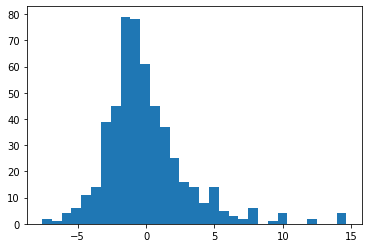

In [8]:
plt.hist(r, 'auto')
plt.show()

In [9]:
mask = r <= np.std(r) * 3 # np.sqrt(sig2)
X = X[mask]
y = y[mask]
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # X.T @ X
beta

array([-1.70094791,  0.50063696,  0.01756833,  0.14558487])

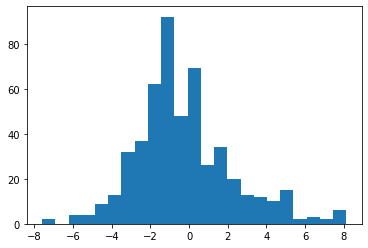

In [10]:
plt.hist(r[mask], 'auto')
plt.show()

## Exercice 5
Tester l'hypothèse de non significativité de exper, avec une hypothèse alternative des deux côtés à 5%:  
$H_0 : \beta_{exper} = 0$  
Calculer le seuil critique de rejet ainsi que la p-value.

In [11]:
from scipy.stats import t #la distribution de student t

In [12]:
r  = y - X.dot(beta)
n, k = X.shape
sig2 = r.T.dot(r) / (n - k)
var = sig2 * np.linalg.inv(X.T.dot(X))
std = np.sqrt(np.diag(var))

beta[2]/std[2]

1.77887789559074

In [13]:
n, k = X.shape
t.sf(beta[2]/std[2], n-k) * 2 

0.07585416697773316

## Exercice 6
Faire le même test en utilisant la bibliothèque statsmodels.

In [14]:
import statsmodels.api as sm
model=sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     78.11
Date:                Sat, 08 Feb 2020   Prob (F-statistic):           1.33e-41
Time:                        17:44:54   Log-Likelihood:                -1204.4
No. Observations:                 515   AIC:                             2417.
Df Residuals:                     511   BIC:                             2434.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7009      0.604     -2.818      0.005      -2.887      -0.515
educ           0.5006      0.043     11.736      0.000       0.417       0.584
exper          0.0176      0.010      1.779      0.076      -0.002       0.037
tenure         0.1456      0.018      8.103      0.000       0.110       0.181
==============================================================================
Omnibus:                       63.796   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.134
Skew:                           0.866   Prob(JB):                     2.68e-20
Kurtosis:                       4.097   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercice 7
Refaire l'exercice 5 avec $y=log(wage)$ (avec le même échantillon qu'en 2-5).

In [15]:
y_log = np.log(y)
beta_log = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_log) # X.T @ X
r  = y_log - X.dot(beta_log)
n, k = X.shape
sig2 = r.T.dot(r) / (n - k)
var = sig2 * np.linalg.inv(X.T.dot(X))
std_log = np.sqrt(np.diag(var))

beta_log[2]/std_log[2]

2.2412779619145424

In [16]:
t.sf(beta_log[2]/std_log[2], n-k) * 2 

0.025436638860709744

## Exercice 8
Tester l'hypothèse :   
$H_0 : \beta_{educ} = 0.6$

In [17]:
test=(beta[1]-0.6)/std[1]
test

-2.329221511737763

In [18]:
test=(beta[1]-0.6)/std[1]
2*(1-t.sf(test,n-k))

0.02023620756802269

## Exercice 9
Tester l'hypothèse :   
$H_0 : \beta_{educ} = \beta_{exper}$

In [19]:
X["toteduc"] = X["educ"] + X["exper"]
X_toteduc = X[["const", "educ", "toteduc", "tenure"]]
X_toteduc.head()

,const,educ,toteduc,tenure
0,1,11,13,0
1,1,12,34,2
2,1,11,13,0
3,1,8,52,28
4,1,12,19,2


In [20]:
model=sm.OLS(y, X_toteduc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     78.11
Date:                Sat, 08 Feb 2020   Prob (F-statistic):           1.33e-41
Time:                        17:44:54   Log-Likelihood:                -1204.4
No. Observations:                 515   AIC:                             2417.
Df Residuals:                     511   BIC:                             2434.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7009      0.604     -2.818      0.005      -2.887      -0.515
educ           0.4831      0.041     11.884      0.000       0.403       0.563
toteduc        0.0176      0.010      1.779      0.076      -0.002       0.037
tenure         0.1456      0.018      8.103      0.000       0.110       0.181
==============================================================================
Omnibus:                       63.796   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.134
Skew:                           0.866   Prob(JB):                     2.68e-20
Kurtosis:                       4.097   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercice 10
Tester l’hypothèse :   
$H_0 : \beta_{educ} + \beta_{exper} = 1$

In [21]:
X["diffeduc"] = X["educ"] - X["exper"] 
X_diff = X[["const", "educ", "diffeduc", "tenure"]]
X_diff.head()

,const,educ,diffeduc,tenure
0,1,11,9,0
1,1,12,-10,2
2,1,11,9,0
3,1,8,-36,28
4,1,12,5,2


In [22]:
y_diff = y - X["educ"]

In [23]:
model=sm.OLS(y_diff, X_diff)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     99.36
Date:                Sat, 08 Feb 2020   Prob (F-statistic):           1.13e-50
Time:                        17:44:55   Log-Likelihood:                -1204.4
No. Observations:                 515   AIC:                             2417.
Df Residuals:                     511   BIC:                             2434.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7009      0.604     -2.818      0.005      -2.887      -0.515
educ          -0.4818      0.047    -10.314      0.000      -0.574      -0.390
diffeduc      -0.0176      0.010     -1.779      0.076      -0.037       0.002
tenure         0.1456      0.018      8.103      0.000       0.110       0.181
==============================================================================
Omnibus:                       63.796   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.134
Skew:                           0.866   Prob(JB):                     2.68e-20
Kurtosis:                       4.097   Cond. No.                         93.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""